<a href="https://colab.research.google.com/github/Vaish181204/PBL_SE/blob/main/Road_Accident_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Loading

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('/content/accident.csv')
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [4]:
# Check for missing values
df.isnull().sum()

# Impute missing values if any
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Convert categorical variables to numeric
df_imputed['Gender'] = df_imputed['Gender'].map({'Male': 0, 'Female': 1})
df_imputed['Helmet_Used'] = df_imputed['Helmet_Used'].map({'No': 0, 'Yes': 1})
df_imputed['Seatbelt_Used'] = df_imputed['Seatbelt_Used'].map({'No': 0, 'Yes': 1})

# Ensure 'Survived' is an integer
df_imputed['Survived'] = df_imputed['Survived'].astype(int)

df_imputed.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,1,27.0,0,0,1
1,69,1,46.0,0,1,1
2,46,0,46.0,1,1,0
3,32,0,117.0,0,1,0
4,60,1,40.0,1,1,0


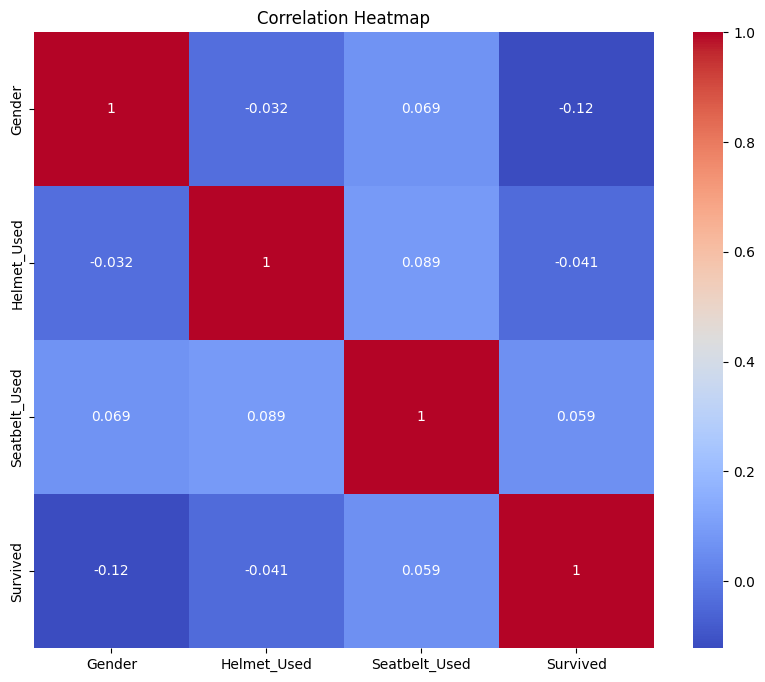

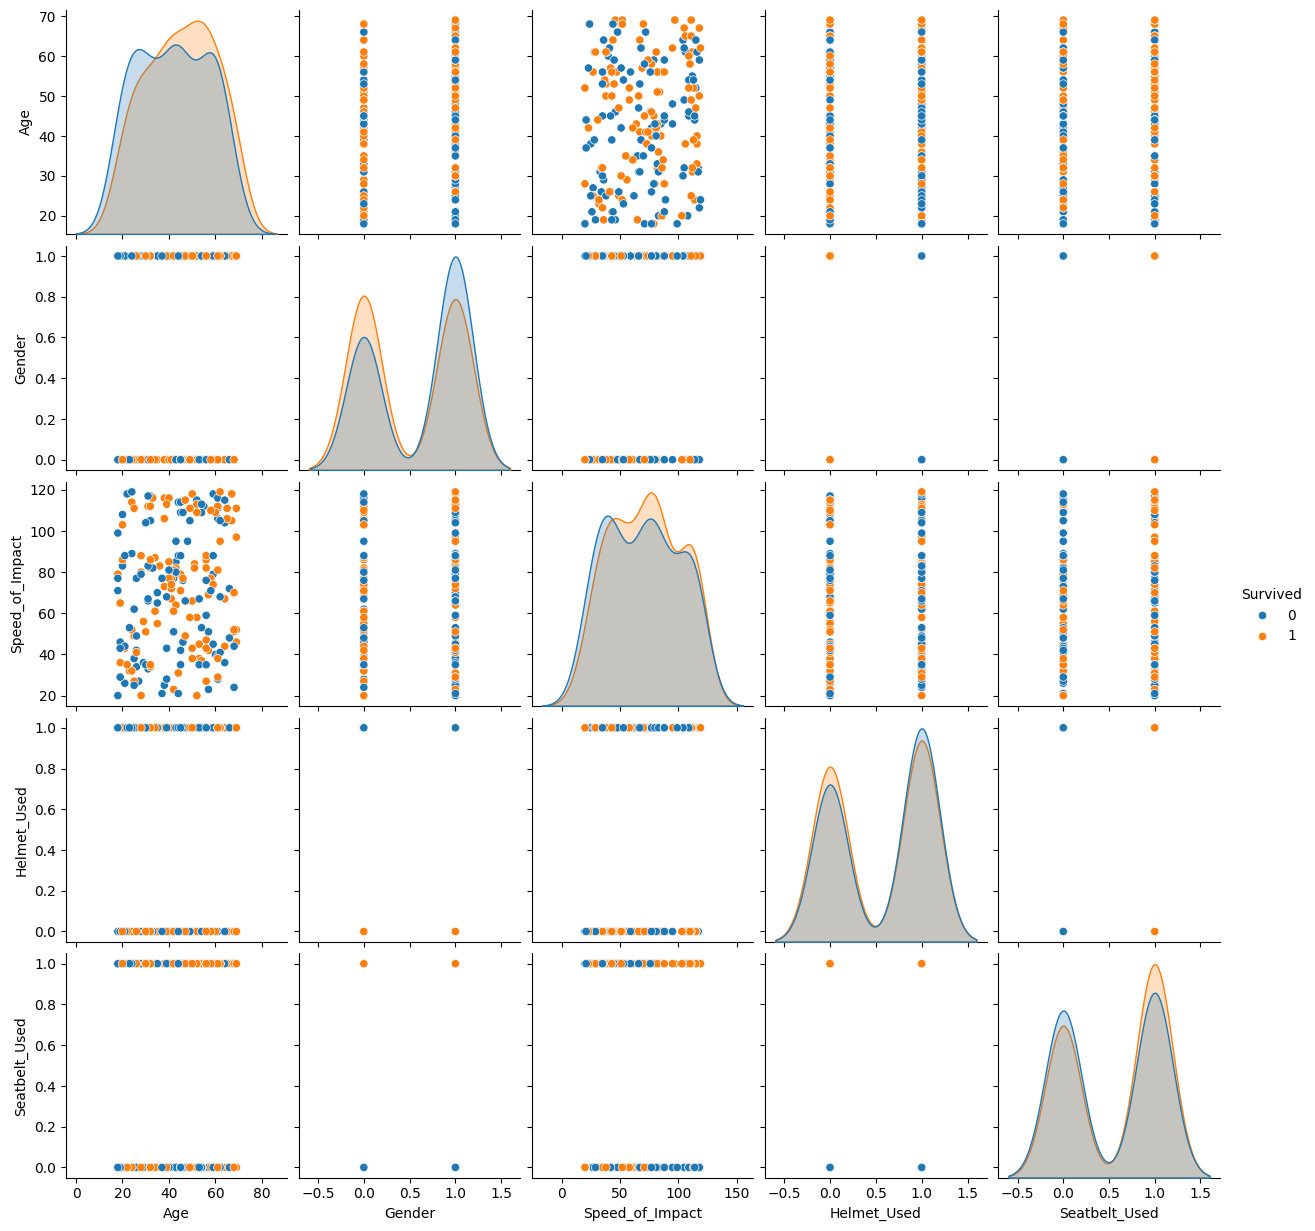

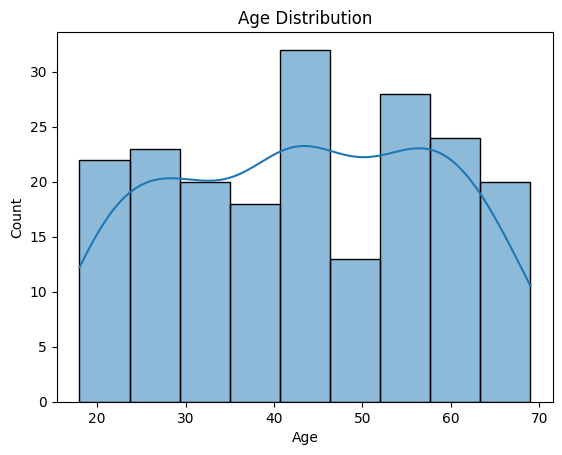

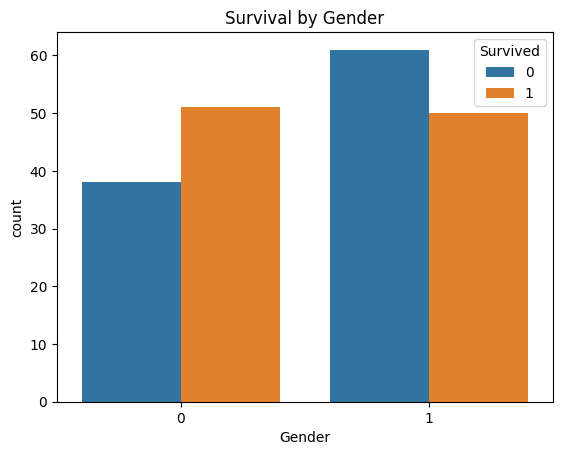

In [5]:
# Correlation heatmap
numeric_df = df_imputed.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pair plot
sns.pairplot(df_imputed, hue='Survived')
plt.show()

# Distribution of age
sns.histplot(df_imputed['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Count plot for gender
sns.countplot(x='Gender', hue='Survived', data=df_imputed)
plt.title('Survival by Gender')
plt.show()

Accuracy: 0.50


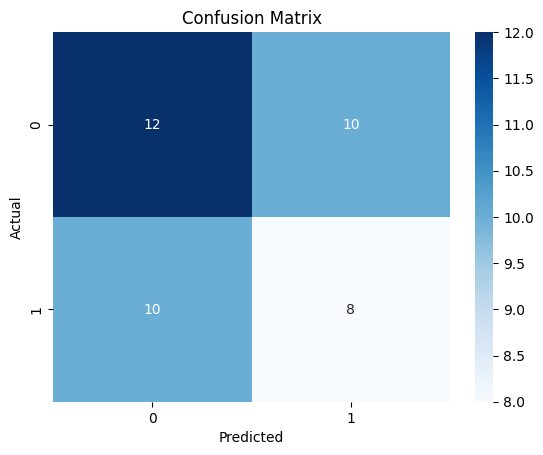

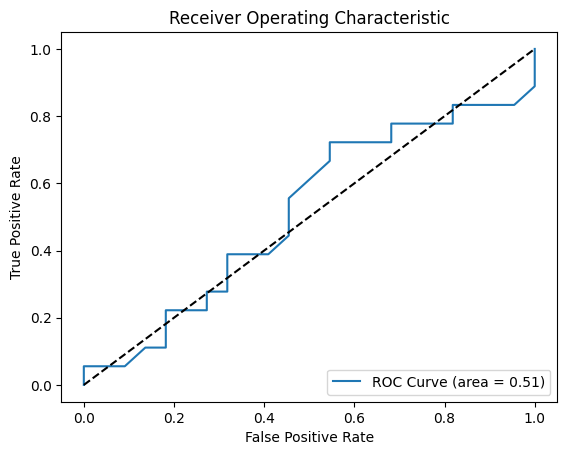

In [6]:
# Split the data into training and testing sets
X = df_imputed.drop('Survived', axis=1)
y = df_imputed['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()